# EDA STROKE ICTUS

### ESTUDIO DE ICTUS 

In [65]:
# Librerías estándar de análisis de datos
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats
import imblearn as imbl

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'imblearn'

In [33]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./stroke_dataset.csv"
#===============================================
# Importamos el dataset
df = pd.read_csv(path_to_data)

#### VARIABLES DECLARADAS
<ul><li><b>gender</b> : género
<li><b>age</b> : edad</li>
<li><b>hypertension</b> : hipertensión</li>
<li><b>heart_disease</b> : enfermo del corazón</li>
<li><b>ever_married</b> : alguna vez casada</li>
<li><b>work_type</b> : funcionaria, autónoma, empresa privada, niños </li>
<li><b>Residence_type</b> : Tipo de residencia, rural o urbano</li>
<li><b>avg_glucose_level</b> : porcentaje de glucosa </li> 
<li><b>bmi</b> : índice de masa corporal.</li>
<li><b>smoking_status</b> : hábito de fumar</li> 
<li><b>stroke</b> : ictus</li>
</ul>    

In [34]:
# VISUALIZAMOS LAS 5 PRIMERAS FILAS
#===============================================
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [35]:
# VISUALIZAMOS LAS 5 ÚLTIMAS FILAS
#===============================================
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [36]:
#CONTAMOS FILAS Y COLUMNAS
#===============================================
df.shape

(4981, 11)

##### 4981 FILAS y 11 COLUMNAS

In [37]:
# INFORMACIÓN DEL DATASET 
#===============================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## OJO!!! 

In [38]:
# PASAMOS A BOLEANOS LAS SIGUIENTES VARIABLES PARA MEJOR TRATAMIENTO DE LOS DATOS
# =============================================
df["hypertension"] = df["hypertension"].astype(bool)
df["heart_disease"] = df["heart_disease"].astype(bool)
df["stroke"] = df["stroke"].astype(bool)
# OTRA FORMA DE HACERLO QUE DEBERÍA FUNCIONAR TAMBIÉN 
# =============================================
# df[["stroke", "hypertension", "heart_disease"]].astype(bool)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB


In [40]:
# PARA VER BALANCEO DE LA VARIABLE TARGET STROKE
df["stroke"].value_counts()

False    4733
True      248
Name: stroke, dtype: int64

##### LA VARIABLE ESTÁ MUY DESEQUILIBRADA

In [41]:
#VISUALIZACIÓN DE NULOS TOTALES EN CADA VARIABLE
#===============================================
df.isnull().sum(axis = 0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### NI UN SOLO VALOR PERDIDO

In [42]:
# ANÁLISIS ESTADÍSTICO BÁSICO
#===============================================
df.describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


In [43]:
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease", "stroke"]
numericas = ["age", "avg_glucose_level", "bmi"]

Una variable puede ser de dos tipos:
* __Categórica__: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su vez pueden ser:
    - __Binarias__: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
    - __Politómicas__: Pueden tomar más de dos valores.   
* __Numérica__: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
    - __Continuas__: Entre dos valores dados, podemos encontrar infinitos valores
    - __Discretas__: Cuando entre dos valores dados, no puede tomar valores intermedios

In [44]:
df[categoricas].describe()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
count,4981,4981,4981,4981,4981,4981,4981,4981
unique,2,2,4,2,4,2,2,2
top,Female,Yes,Private,Urban,never smoked,False,False,False
freq,2907,3280,2860,2532,1838,4502,4706,4733


In [45]:
#CONTEO DE VALORES EN LAS VARIABLES CATEGÓRICAS
#===============================================
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: gender
Female    2907
Male      2074
Name: gender, dtype: int64

Column name: ever_married
Yes    3280
No     1701
Name: ever_married, dtype: int64

Column name: work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Column name: Residence_type
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

Column name: smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

Column name: hypertension
False    4502
True      479
Name: hypertension, dtype: int64

Column name: heart_disease
False    4706
True      275
Name: heart_disease, dtype: int64

Column name: stroke
False    4733
True      248
Name: stroke, dtype: int64



In [46]:
#DATOS DUPLICADOS 
#===============================================
df_duplicadas = df[df.duplicated()]
len(df_duplicadas)

0

<h2> GRÁFICOS RELEVANTES</h2>
    

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>]], dtype=object)

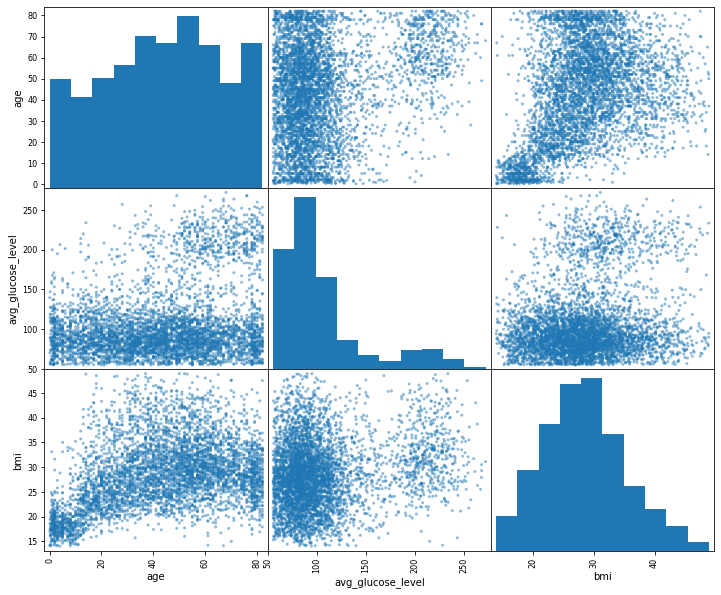

In [47]:
#PARA VER LA CORRELACIÓN ENTRE LAS VARIABLES
#===============================================
pd.plotting.scatter_matrix(df[numericas], figsize=(12,10))

In [48]:
 df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


<AxesSubplot:>

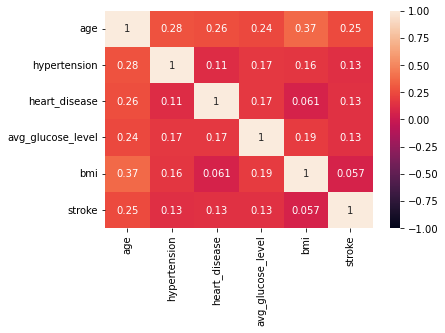

In [49]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
#===============================================
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot:>

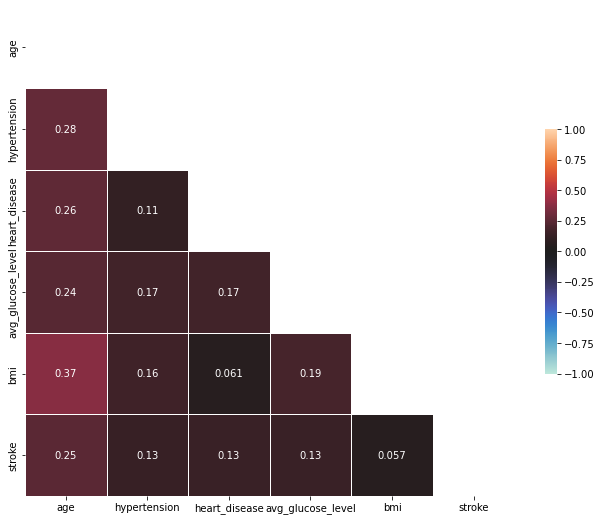

In [50]:
# Ahora igual pero más bonito
#===========================================================================
# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
#===========================================================================
# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))
#===========================================================================
# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

##### BAJA CORRELACIÓN ENTRE LAS VARIABLES COMO TAMBIÉN HABÍAMOS APRECIADO EN LA TABLA Y GRÁFICO ANTERIOR.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

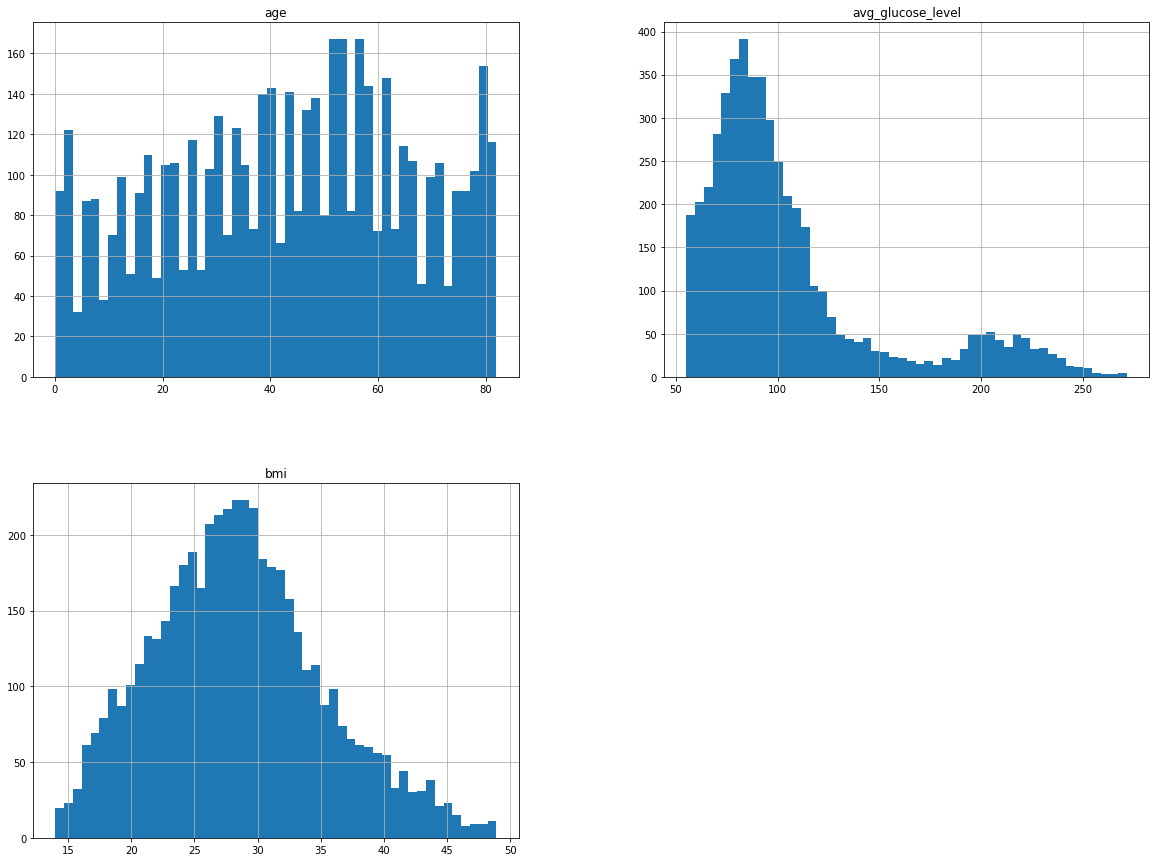

In [51]:
# HISTOGRAMAS DE LAS VARIABLES NUMÉRICAS PARA VER SUS DISTRIBUCIONES
df[numericas].hist(bins=50, figsize=(20,15))

##### LAS VARIABLES AGE, AVG_GLUCOSE_LEVEL Y BMI TIENEN DISTRIBUCIONES NORMALES

<AxesSubplot:xlabel='age', ylabel='Count'>

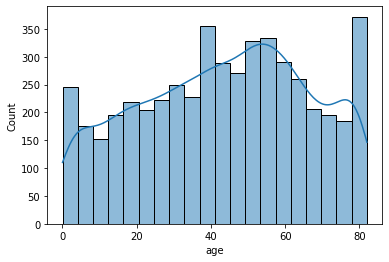

In [52]:
sns.histplot(data=df, x="age", kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

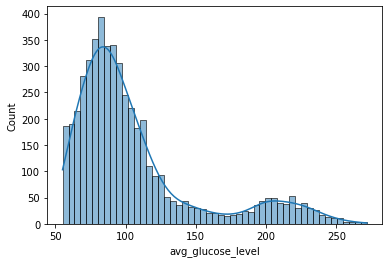

In [53]:
sns.histplot(data=df, x="avg_glucose_level", kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

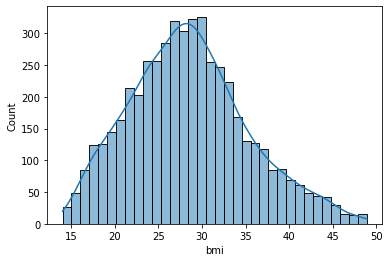

In [54]:
sns.histplot(data=df, x="bmi", kde=True)

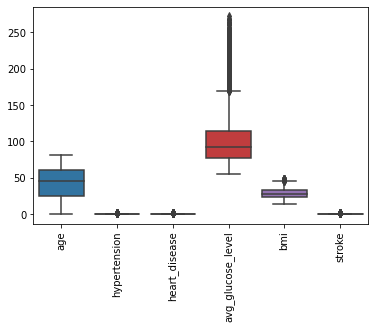

In [55]:
# Observamos los outlers de las variables numéricas
# =======================================================
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [56]:
#Comprobar cuántos valores perdemos si nos quedamos con menores de 45 en bmi
# ===================================================================
len(df[df["bmi"]>45])

65

<AxesSubplot:xlabel='bmi', ylabel='age'>

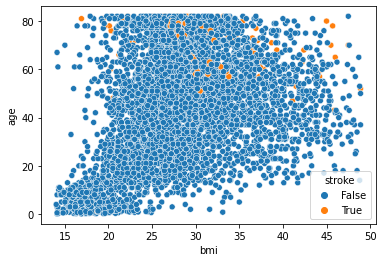

In [57]:
# VISUALIZAMOS LAS VARIABLES
sns.scatterplot(data=df, x="bmi", y="age", hue="stroke")

## OJO!!!! REVISAR ESTA VARIABLE POR SI EL MODELO NO FUESE CORRECTO

<AxesSubplot:xlabel='bmi'>

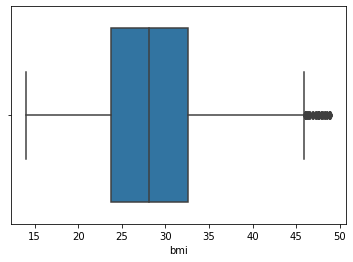

In [58]:
# VISUALIZACIÓN DE LA VARIABLE BMI Y SUS POSIBLES OUTLIERS
# =======================================================
df["bmi"].skew()
sns.boxplot(x=df["bmi"])

<AxesSubplot:xlabel='age'>

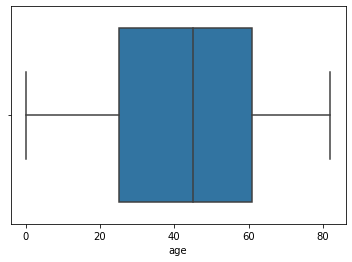

In [59]:
# VISUALIZACIÓN DE LA VARIABLE AGE
# =======================================================
df["age"].skew()
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='avg_glucose_level'>

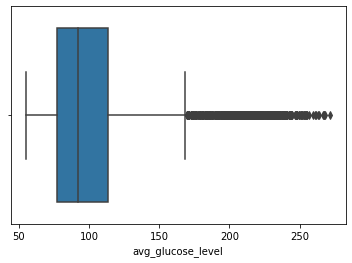

In [60]:
# VISUALIZACIÓN DE LA VARIABLE avg_glucose_level
# =======================================================
df["avg_glucose_level"].skew()
sns.boxplot(x=df["avg_glucose_level"])

<AxesSubplot:xlabel='avg_glucose_level'>

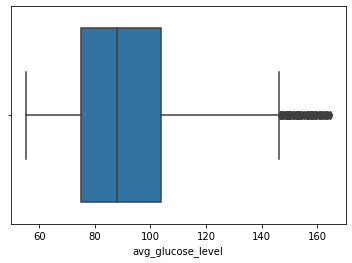

In [61]:
sns.boxplot(x= df[(df["avg_glucose_level"]<165 )]["avg_glucose_level"])

## INGENIERÍA DE CARACTERÍSTICAS

In [64]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Float

rus = RandomUnderSampler(sampling_strategy= not minority) # String
X_res, y_res = rus.fit_resample(X,y)
X = X_res
y = y_res



ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Aplicamos logaritmo en base 10 
log_glucose = np.log(df["avg_glucose_level"])
#Crea columna log_price
df["avg_glucose_level"] = log_glucose
sns.histplot(x=log_glucose, kde=True)
df.info()

# Modelo

In [ ]:
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease"]
numericas = ["age", "avg_glucose_level", "bmi"]

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [ ]:
X = transformer.fit_transform(X)

In [ ]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())

In [ ]:
transformer.output_indices_

# Entrenamos

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Modelos


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Métricas

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [ ]:
# DRY

def train_evaluate(nombre_modelo, modelo):
    mod = modelo()
    mod.fit(X_train, y_train)
    y_predict = mod.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    
    print(nombre_modelo)
    print()
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"f1: {f1}")
    print()

In [63]:
train_evaluate("Gradient Boosting Classifier", GradientBoostingClassifier)

NameError: name 'train_evaluate' is not defined

In [ ]:
# 1er resultados
# Gradient Boosting Classifier

# accuracy: 0.9502407704654896
# precision: 0.14285714285714285
# recall: 0.017543859649122806
# f1: 0.03125
